# Funktion sovittaminen histogrammiin

Tutustutaan tässä harjoituksessa siihen, miten histogrammiin voidaan tehdä sovite. Sovite on erinomainen työkalu, kun halutaan selvittää esimerkiksi jakauman odotusarvo ja hajonta. Hiukkasfysiikan tapauksessa tämä tulee kyseeseen, kun pyritään selvittämään histogrammissa olevan piikin paikkaa ja leveyttä.

Tutkitaan hiukkasfysiikan dataa sellaisista törmäyksistä, joissa on havaittu kaksi myonia. Data on haettu CERN:n avoin data portaalista ja se löytyy tämän notebookin kanssa samasta hakemistosta nimellä "Dimuon_DoubleMu.csv".

## Datan hakeminen ja piirtäminen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/Dimuon_DoubleMu.csv')
data.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


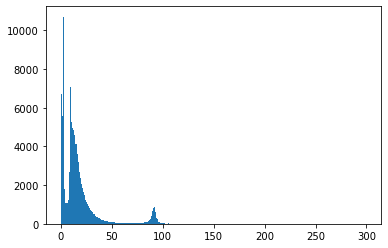

In [2]:
plt.hist(data['M'], bins=300)
plt.show()

Rajataan tarkastelumme invariantin massan välille 80 GeV - 100 GeV ja piirretään data tällä välillä. Huom. Tällä kertaa `plt.hist()`-funktion paluuarvot on otettu talteen. Funktiolla on kolme paluuarvoa, joista meitä kiinnostaa kaksi ensimmäistä: histogrammin pylväiden arvot sekä pylväiden reunat.

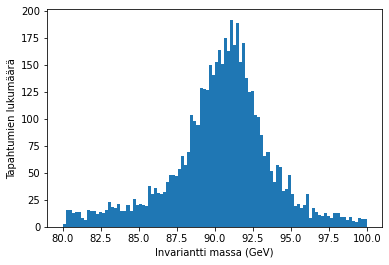

In [3]:
alaraja = 80
yläraja = 100
pylväitä = 100

plt.figure()
arvot, reunat, _ = plt.hist(data['M'], bins=pylväitä, range=(alaraja, yläraja))
plt.xlabel('Invariantti massa (GeV)')
plt.ylabel('Tapahtumien lukumäärä')
plt.show()

## Sovitefunktion määritteleminen

Tavoitteenamme on tehdä sovite yllä olevaan jakaumaan. Hiukkasfysiikassa yleisesti käytettävä jakaumafunktio on [Breit-Wigner -jakauma](https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution), mutta käytetään tässä Gaussin jakaumaa, joka ottaa taustatapahtumat myös huomioon.

Tällainen Gaussin funktio on muotoa:

$f(x) = a\frac{e^{-(x-\mu)^2}}{2\sigma^2} + bx + c$,

missä $a$ on kerroin, $\mu$ odotusarvo, $\sigma^2$ varianssi ja $b$ ja $c$ taustatapahtumiin liittyviä kertoimia.

Määritellään funktio:

In [4]:
import numpy as np

def gauss(x, *p):
    a, mu, sigma, b, c = p
    return a*np.exp(-(x-mu)**2/(2.*sigma**2)) + b*x + c

## Sovitteen tekeminen

Tehdään seuraavaksi sovite scipy-paketin curve_fit -funktiolla. Meidän tulee kuitenkin ensin määrittää pylväiden keskikohdat, jotta sovite osuu oikealle kohdalle.

Odotusarvo =  90.85832625652122
Piikin leveys =  4.493052850735726


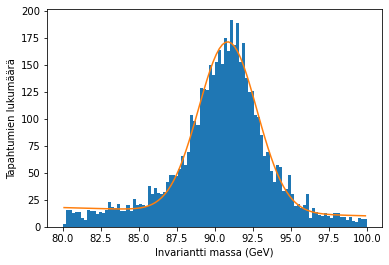

In [5]:
from scipy.optimize import curve_fit

# Pylväiden keskikohdat saadaan ottamalla kahden vierekkäisen reunan keskiarvo
keskikohdat = (reunat[:-1] + reunat[1:])/2

# Sovitetta varten tarvitaan sopivat alkuarvaukset. Jos sovite epäonnistuu, kokeile jotain muita alkuarvoja
# Alkuarvot ovat järjestyksessä a, mu, sigma, b, c
p0 = [100, 90, 1, 1, 1]

# Lasketaan optimaaliset kertoimet
kertoimet, _ = curve_fit(gauss, keskikohdat, arvot, p0=p0)

# Lasketaan sovite kertoimien avulla
sovite = gauss(keskikohdat, *kertoimet)

# Piirretään alkuperäinen histogrammi sekä sovitefunktio
plt.hist(data['M'], bins=pylväitä, range=(alaraja, yläraja))
plt.plot(keskikohdat, sovite, label='Sovite')
plt.xlabel('Invariantti massa (GeV)')
plt.ylabel('Tapahtumien lukumäärä')

# Tulostetaan odotusarvo ja piikin leveys (FWHM)
print('Odotusarvo = ', kertoimet[1])
print('Piikin leveys = ', 2*np.sqrt(2*np.log(2))*kertoimet[2])

plt.show()

Tämän tuloksen perusteella saamme Z-bosonin massaksi noin 90,86 GeV. Kokeile, saatko sovitettua [Breit-Wigner -jakauman](https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution) histogrammiin. Onko sovite parempi kuin Gaussin jakauma? Kokeile myös, miten pylväiden lukumäärän muuttaminen vaikuttaa tulokseen.